<a href="https://colab.research.google.com/github/Kavya2905/Salary-Prediction/blob/main/Salary_Prediction_Using_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
### Import the libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
### Read the csv file

data=pd.read_csv("/content/Salary_Data.csv")
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
x = data["YearsExperience"].values # [].values for array
y = data["Salary"].values
x.shape                            # for shape of the array


(30,)

In [ ]:
y.shape

(30,)

In [ ]:
len(data)                         # gives number ofsamples

30

In [ ]:
x=x.reshape(len(x), 1)           # to reshape the array
x.shape

In [ ]:
x                                # to obtain the array

In [ ]:
x.ndim                           # to obatain the dimension of array

2

In [ ]:
### To divide into training and testing samples

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.80,random_state=0)

In [ ]:
ytrain.shape

(24,)

In [ ]:
### Build the model

from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
### Train the model

model.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
### Predict the model

ypred = model.predict(xtest) 
ypred

array([ 40748.96184072, 122699.62295594,  64961.65717022,  63099.14214487,
       115249.56285456, 107799.50275317])

In [ ]:
xtrain.shape

(24, 1)

In [ ]:
ytrain.shape

array([ 37731., 122391.,  57081.,  63218., 116969., 109431.])

In [ ]:
### To calculate the accuracy of the model

from sklearn.metrics import r2_score
r2 = r2_score(ytest,ypred)              # r2 is accuracy calculation
r2                                      # if r2 close to one, good accuracy

0.988169515729126

In [ ]:
### Line of Regression for Training Samples
plt.scatter(xtrain,ytrain,color='red')
plt.scatter(xtrain,model.predict(xtrain),color='blue')
plt.plot(xtrain,model.predict(xtrain),color='orange')
plt.show()

NameError: ignored

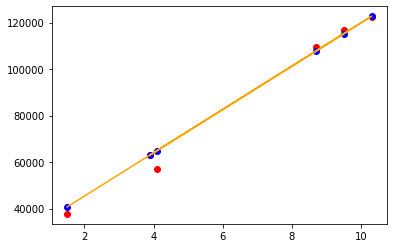

In [ ]:
### Line of Regression for Testing Samples
plt.scatter(xtest,ytest,color='red')
plt.scatter(xtest,model.predict(xtest),color='blue')
plt.plot(xtest,model.predict(xtest),color='orange')
plt.show()

In [ ]:
m = model.coef_
c = model.intercept_
print(m,c)

[9312.57512673] 26780.09915062818


In [ ]:
test_sal = m * 5.5 + c       # testing salary for 5.5 yrs randomly, equation of line is used
test_sal

array([77999.26234764])

In [ ]:
model.predict([[5.5]])       # alternative methode for randon salary testing

array([77999.26234764])

In [ ]:
### Save the model to a file

import joblib
joblib.dump(model,"salary.pkl")

['salary.pkl']

In [ ]:
### Load the model

mymodel=joblib.load("/content/salary.pkl")

In [ ]:
mymodel.predict([[15.15]])                                  # prediction for 15.15 years

array([167865.61232058])

In [ ]:
mymodel.predict([[10]])                                     # prediction for 10 years

array([119905.85041792])

In [ ]:
### Giving input to predict the salary

def salary_predict():
  exp = float(input("Enter Experience in Years :"))
  salary = mymodel.predict([[exp]])
  print("The expected salary would be Rs" + str(salary[0]))

In [ ]:
salary_predict()

Enter Experience in Years :5.5
The expected salary would be Rs77999.26234763872


In [ ]:
 #   Note: Random value can be changed to obtain better accuracy